<a href="https://colab.research.google.com/github/Ayanlola2002/Technidus_project/blob/master/PropertyMLsolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
import sklearn.model_selection as ms
#from xgboost import XGBClassifier
#from xgboost import XGBRegressor
#from sklearn.ensemble import GradientBoostingRegressor
#import lightgbm as lgbm
import sklearn.metrics as sklm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
%matplotlib inline

In [ ]:
#import datasets

train = pd.read_csv("train.csv",encoding = "ISO-8859-1")

test = pd.read_csv("test.csv",encoding = "ISO-8859-1")

In [ ]:
#train = train1.merge(train2,how="left",on='row_id')
train.head()

,no,bedrooms,bathrooms,toilets,parking,description,other_description,location,spec_location,price
0,9026,2,2,3,5,2 bedroom flat for rent,2 Bedroom Flat,surulere,"Off Adekunle Kuye Street., Kilo, Surulere, Lagos",1000000
1,40390,1,1,1,1,1 bedroom mini flat for rent,Mini Flat,surulere,"Nnobi Street, Kilo, Surulere, Lagos",370000
2,85193,2,2,3,2,2 bedroom flat for rent,Relatively New 2bedroom Flat Apartment,gbagada,"Atunrase Estate, Gbagada, Lagos",1100000
3,14410,1,1,1,1,1 bedroom self contained (single rooms) for rent,Luxurious Room Self Contained,gbagada,"Ola Adebiyi Street Peace Estate, Soluyi, Gbaga...",400000
4,86032,3,2,2,2,3 bedroom flat for rent,Renovated 3 Bedrooms Ground Flat,gbagada,"Soluyi, Gbagada, Lagos",1200000


In [ ]:
train.shape

(243, 10)

In [ ]:
train.isnull().sum()

no                   0
bedrooms             0
bathrooms            0
toilets              0
parking              0
description          0
other_description    0
location             0
spec_location        0
price                0
dtype: int64

In [ ]:
#merge train and test
train2 = train.append(test,ignore_index = True)

In [ ]:
#convert price to integer
train2['price'] = train2['price'].astype(int)

In [ ]:
train2.shape

(346, 10)

In [ ]:
#create new features
train2['estate_flag'] = train2['spec_location'].apply(lambda x: len([c for c in str(x).lower().split() if "estate" in c]))
train2['terrace_flag'] = train2['other_description'].apply(lambda x: len([c for c in str(x).lower().split() if "terraced" 
                                                                  in c or "terrace" in c or "detached" in c
                                                                 or "duplex" in c]))
train2['new_flag'] = train2['other_description'].apply(lambda x: len([c for c in str(x).lower().split()
                                                              if "new" in c or "luxur" in c 
                                                              or "executive" in c]))
train2['serviced_flag'] = train2['other_description'].apply(lambda x: len([c for c in str(x).lower().split() if "service" in c]))

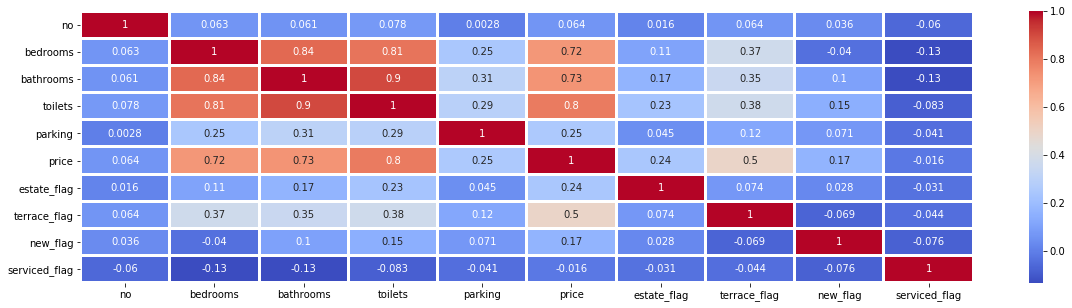

In [ ]:
corr= train2.corr()
#corr
f, ax = plt.subplots(figsize=(20, 5))
sns.heatmap(corr,cmap='coolwarm',linewidths=2.0, annot=True)

In [ ]:
corr

,no,bedrooms,bathrooms,toilets,parking,price,estate_flag,terrace_flag,new_flag,serviced_flag
no,1.000000,0.062508,0.061249,0.077615,0.002790,0.063917,0.016235,0.064324,0.036219,-0.059913
bedrooms,0.062508,1.000000,0.837686,0.813749,0.247634,0.721756,0.109317,0.372372,-0.039763,-0.130750
bathrooms,0.061249,0.837686,1.000000,0.904322,0.309417,0.733077,0.166275,0.353621,0.102735,-0.132839
toilets,0.077615,0.813749,0.904322,1.000000,0.292225,0.796387,0.232286,0.375831,0.149439,-0.083073
parking,0.002790,0.247634,0.309417,0.292225,1.000000,0.254786,0.044857,0.123498,0.070950,-0.040960
price,0.063917,0.721756,0.733077,0.796387,0.254786,1.000000,0.243817,0.495995,0.166934,-0.015923
estate_flag,0.016235,0.109317,0.166275,0.232286,0.044857,0.243817,1.000000,0.073835,0.028419,-0.031485
terrace_flag,0.064324,0.372372,0.353621,0.375831,0.123498,0.495995,0.073835,1.000000,-0.069012,-0.044128
new_flag,0.036219,-0.039763,0.102735,0.149439,0.070950,0.166934,0.028419,-0.069012,1.000000,-0.075869
serviced_flag,-0.059913,-0.130750,-0.132839,-0.083073,-0.040960,-0.015923,-0.031485,-0.044128,-0.075869,1.000000


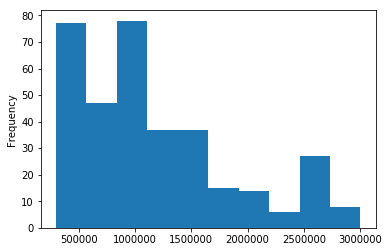

In [ ]:
#Examine distribution of all houses to identify outliers
train2['price'].plot("hist")

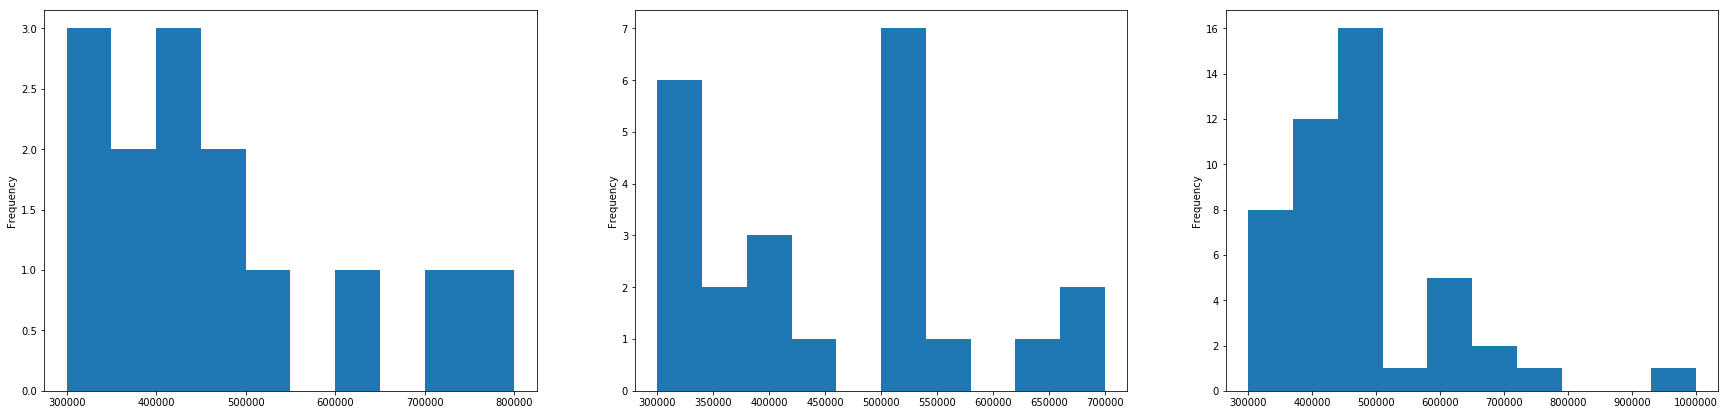

In [ ]:
#Inspect the distribution of houses per location and size of house
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30,7))
fig.add_subplot(1, 3, 1)
train2['price'][(train2['location']=="gbagada")&(train2['bedrooms']==1)].plot("hist")
fig.add_subplot(1, 3, 2)
train2['price'][(train2['location']=="surulere")&(train2['bedrooms']==1)].plot("hist")
fig.add_subplot(1, 3, 3)
train2['price'][(train2['location']=="yaba")&(train2['bedrooms']==1)].plot("hist")

In [ ]:
#Since some houses may have missing info it means some estate/serviced houses are not called estate/serviced houses. 
#Assumptions are made around houses which are not identified as estate/ service houses. 
#The median/50th percentile of those houses is identified and any house above the median is considered as estate.
#Houses higher than 80th percentile are classified as serviced


estate_price = []
import numpy as np
for location in ["gbagada","surulere","yaba"]:
    for i in range(1,6):
        d = {}
        d['location'] = location
        d['bedspace'] = i
        try:
            d['estate_price'] = np.percentile(train2['price'][(train2['location']==location)&(train2['bedrooms']==i)&(train2['estate_flag']==0)],50)
            d['serviced_price'] = np.percentile(train2['price'][(train2['location']==location)&(train2['bedrooms']==i)&(train2['estate_flag']==0)],80)
        except (IndexError,TypeError) as e:
            d['serviced_price'] = 0
            d['estate_price'] = 0
        estate_price.append(d)
        try:
            print("This is the median for {bed} bedroom in {location} : ".format(bed = i,location = location) ,np.percentile(train2['price'][(train2['location']==location)&(train2['bedrooms']==i)&(train2['estate_flag']==0)],50))
        except (IndexError,TypeError) as e:
            print("This is the median for {bed} bedroom in {location} : ".format(bed = i,location = location) ,0)

This is the median for 1 bedroom in gbagada :  450000.0
This is the median for 2 bedroom in gbagada :  1000000.0
This is the median for 3 bedroom in gbagada :  1300000.0
This is the median for 4 bedroom in gbagada :  2200000.0
This is the median for 5 bedroom in gbagada :  2500000.0
This is the median for 1 bedroom in surulere :  475000.0
This is the median for 2 bedroom in surulere :  950000.0
This is the median for 3 bedroom in surulere :  1300000.0
This is the median for 4 bedroom in surulere :  2500000.0
This is the median for 5 bedroom in surulere :  2500000.0
This is the median for 1 bedroom in yaba :  475000.0
This is the median for 2 bedroom in yaba :  750000.0
This is the median for 3 bedroom in yaba :  1300000.0
This is the median for 4 bedroom in yaba :  2000000.0
This is the median for 5 bedroom in yaba :  0


In [ ]:
#save the output in a dataframe and in order to merge with original dataframe
estate_price=pd.DataFrame(estate_price)
estate_price['locationbed'] = estate_price['location'] + estate_price['bedspace'].astype(str)
estate_price = estate_price.drop(["location","bedspace"],axis=1)

In [ ]:
estate_price.head()

,estate_price,serviced_price,locationbed
0,450000.0,600000.0,gbagada1
1,1000000.0,1060000.0,gbagada2
2,1300000.0,1620000.0,gbagada3
3,2200000.0,2260000.0,gbagada4
4,2500000.0,2500000.0,gbagada5


In [ ]:
#merge to original dataframe to create new dataframe
train2['locationbed']  = train2 ['location'] + train2 ['bedrooms'].astype(str)
train3 = pd.merge(train2,estate_price, on ="locationbed", how = "left")

In [ ]:
#identify estate houses that were not called estate houses by assigning houses greater than median as estate houses
#identify serviced houses that were not called serviced houses by assigning houses greater than 80th percentile as serviced houses
#terrace houses are typically greater than 1.8m based on distribution
train3['estate_flag'][(train3['bedrooms']==1)&(train3['price'] > train3['estate_price'])] = 1
train3['estate_flag'][(train3['bedrooms']==2)&(train3['price'] > train3['estate_price'])] = 1
train3['estate_flag'][(train3['bedrooms']==3)&(train3['price'] > train3['estate_price'])] = 1
train3['estate_flag'][(train3['bedrooms']==4)&(train3['price'] > train3['estate_price'])] = 1
train3['estate_flag'][(train3['bedrooms']==5)&(train3['price'] > train3['estate_price'])] = 1
train3['serviced_flag'][(train3['bedrooms']==1)&(train3['price'] > train3['serviced_price'])] = 1
train3['serviced_flag'][(train3['bedrooms']==2)&(train3['price'] > train3['serviced_price'])] = 1
train3['serviced_flag'][(train3['bedrooms']==3)&(train3['price'] > train3['serviced_price'])] = 1
train3['serviced_flag'][(train3['bedrooms']==4)&(train3['price'] > train3['serviced_price'])] = 1
train3['serviced_flag'][(train3['bedrooms']==5)&(train3['price'] > train3['serviced_price'])] = 1

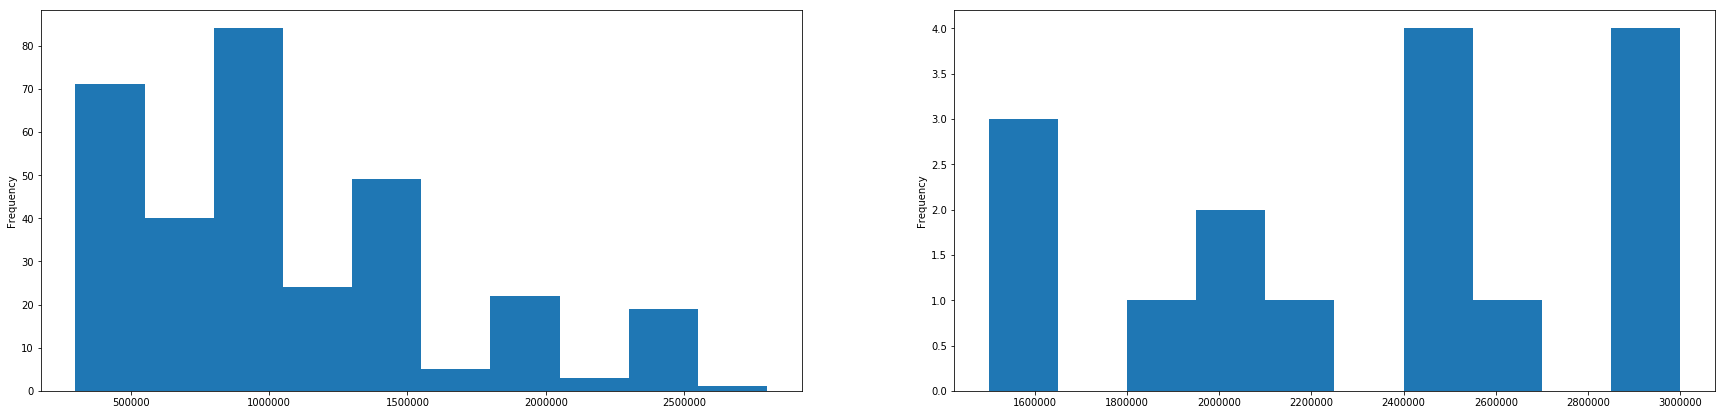

In [ ]:
#inspect houses that are terrace/duplex/detached to see if they are typically higher 
fig = plt.figure(figsize=(30,7))
fig.add_subplot(1, 2, 1)
train3['price'][train3['terrace_flag']==0].plot("hist")
fig.add_subplot(1, 2, 2)
train3['price'][train3['terrace_flag']==1].plot("hist")

In [ ]:
#terrace houses are typically>1.8m from the above chart
train3['terrace_flag'][train3['price'] > 1800000] = 1

In [ ]:
#Location is not giving the best results as a feature, however merging location and number of beds and ranking that 
#gives your model a better and stronger feature because the lower the rank, the lower the price.
g = train3.groupby(['location','bedrooms'])['price'].median().reset_index().sort_values('price')
g['location_rank']= g['price'].rank()#np.linspace(1,14,14)
g['location_rank'] = g['location_rank'].astype(int)
g['locationbed'] = g['location'] + g ['bedrooms'].astype(str)
g = g.drop(["price","location","bedrooms"],axis=1)
g
#.columns

,location_rank,locationbed
0,1,gbagada1
5,2,surulere1
10,3,yaba1
11,4,yaba2
6,5,surulere2
1,6,gbagada2
7,7,surulere3
12,7,yaba3
2,9,gbagada3
3,10,gbagada4


In [ ]:
#merge to dataframe
train3 = pd.merge(train3,g, on ="locationbed", how = "left")

In [ ]:
train3.shape

(346, 18)

In [ ]:
train3.columns

Index(['no', 'bedrooms', 'bathrooms', 'toilets', 'parking', 'description',
       'other_description', 'location', 'spec_location', 'price',
       'estate_flag', 'terrace_flag', 'new_flag', 'serviced_flag',
       'locationbed', 'estate_price', 'serviced_price', 'location_rank'],
      dtype='object')

In [ ]:
#make similar assumptions for new/luxurious/executive houses which were not classified as that
new_price = []
import numpy as np
for location in ["gbagada","surulere","yaba"]:
    for i in range(1,6):
        d = {}
        d['location'] = location
        d['bedspace'] = i
        try:
            d['estate_price'] = np.percentile(train2['price'][(train2['location']==location)&(train2['bedrooms']==i)&(train2['estate_flag']==0)],50)
            d['new_price'] = np.percentile(train2['price'][(train2['location']==location)&(train2['bedrooms']==i)&(train2['estate_flag']==0)],80)
        except (IndexError,TypeError) as e:
            d['new_price'] = 0
            d['estate_price'] = 0
        new_price.append(d)
        try:
            print("This is the median for {bed} bedroom in {location} : ".format(bed = i,location = location) ,np.percentile(train2['price'][(train2['location']==location)&(train2['bedrooms']==i)&(train2['estate_flag']==0)],80))
        except (IndexError,TypeError) as e:
            print("This is the median for {bed} bedroom in {location} : ".format(bed = i,location = location) ,0)

This is the median for 1 bedroom in gbagada :  600000.0
This is the median for 2 bedroom in gbagada :  1060000.0
This is the median for 3 bedroom in gbagada :  1619999.9999999995
This is the median for 4 bedroom in gbagada :  2260000.0
This is the median for 5 bedroom in gbagada :  2500000.0
This is the median for 1 bedroom in surulere :  500000.0
This is the median for 2 bedroom in surulere :  1200000.0
This is the median for 3 bedroom in surulere :  1720000.0000000002
This is the median for 4 bedroom in surulere :  2700000.0
This is the median for 5 bedroom in surulere :  2800000.0
This is the median for 1 bedroom in yaba :  550000.0
This is the median for 2 bedroom in yaba :  1000000.0
This is the median for 3 bedroom in yaba :  2000000.0
This is the median for 4 bedroom in yaba :  2600000.0
This is the median for 5 bedroom in yaba :  0


In [ ]:
new_price = pd.DataFrame(new_price)
new_price['locationbed'] = new_price['location'] + new_price['bedspace'].astype(str)
new_price = new_price.drop(["estate_price","location","bedspace"],axis=1)
new_price

,new_price,locationbed
0,600000.0,gbagada1
1,1060000.0,gbagada2
2,1620000.0,gbagada3
3,2260000.0,gbagada4
4,2500000.0,gbagada5
5,500000.0,surulere1
6,1200000.0,surulere2
7,1720000.0,surulere3
8,2700000.0,surulere4
9,2800000.0,surulere5


In [ ]:
#train2['locationbed']  = train2 ['location'] + train2 ['bedrooms'].astype(str)
train3 = pd.merge(train3,new_price, on ="locationbed", how = "left")

In [ ]:
train3.shape

(346, 19)

In [ ]:
#assign houses to new/luxurious/executive based on price
train3['new_flag'][(train3['bedrooms']==1)&(train3['price'] > train3['new_price'])] = 1
train3['new_flag'][(train3['bedrooms']==2)&(train3['price'] > train3['new_price'])] = 1
train3['new_flag'][(train3['bedrooms']==3)&(train3['price'] > train3['new_price'])] = 1
train3['new_flag'][(train3['bedrooms']==4)&(train3['price'] > train3['new_price'])] = 1
train3['new_flag'][(train3['bedrooms']==5)&(train3['price'] > train3['new_price'])] = 1

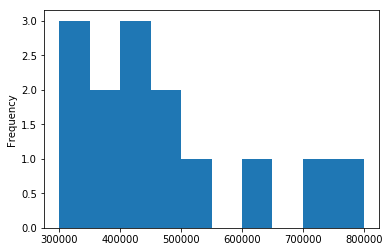

In [ ]:
#Conduct additional inspoection for each location and type of house
import matplotlib.pyplot as plt
train2['price'][(train2['location']=="gbagada")&(train2['bedrooms']==1)].plot("hist")

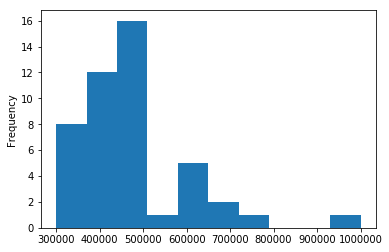

In [ ]:
import matplotlib.pyplot as plt
train2['price'][(train2['location']=="yaba")&(train2['bedrooms']==1)].plot("hist")

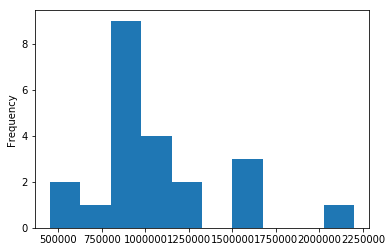

In [ ]:
import matplotlib.pyplot as plt
train2['price'][(train2['location']=="surulere")&(train2['bedrooms']==2)].plot("hist")

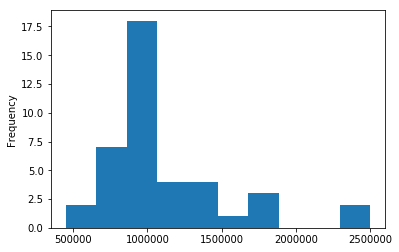

In [ ]:
import matplotlib.pyplot as plt
train2['price'][(train2['location']=="gbagada")&(train2['bedrooms']==2)].plot("hist")

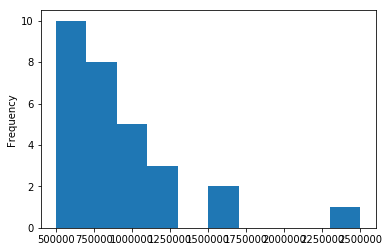

In [ ]:
import matplotlib.pyplot as plt
train2['price'][(train2['location']=="yaba")&(train2['bedrooms']==2)].plot("hist")

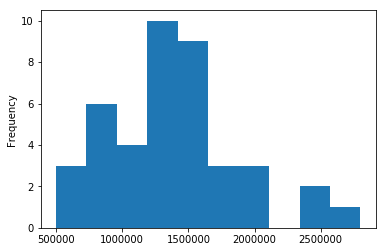

In [ ]:
import matplotlib.pyplot as plt
train2['price'][(train2['location']=="surulere")&(train2['bedrooms']==3)].plot("hist")

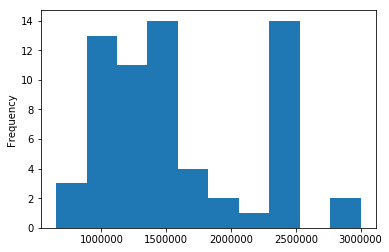

In [ ]:
import matplotlib.pyplot as plt
train2['price'][(train2['location']=="gbagada")&(train2['bedrooms']==3)].plot("hist")

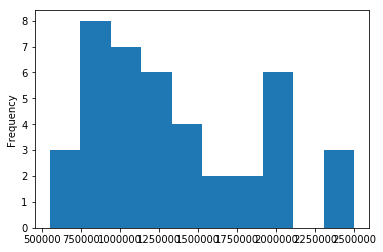

In [ ]:
import matplotlib.pyplot as plt
train2['price'][(train2['location']=="yaba")&(train2['bedrooms']==3)].plot("hist")

In [ ]:
#The distribution has a wide variation. It is possible type of area also determines price. We can make a feature for thsi
#create a feature that determines type of area a house is in based on price. 1 being lowest and 4 being highest type of area
train3['exec_flag']=1
train3['exec_flag'][(train3['bedrooms']==3)&(train3['location']=="gbagada") & (train3['price']>= 1700000)]= 2
train3['exec_flag'][(train3['bedrooms']==3)&(train3['location']=="yaba") & (train3['price']>= 1500000)]= 2
train3['exec_flag'][(train3['bedrooms']==3)&(train3['location']=="surulere") & (train3['price']>= 1500000)]= 2
train3['exec_flag'][(train3['bedrooms']==3)&(train3['location']=="gbagada") & (train3['price']>= 2000000)]= 3
train3['exec_flag'][(train3['bedrooms']==3)&(train3['location']=="yaba") & (train3['price']>= 1800000)]= 3
train3['exec_flag'][(train3['bedrooms']==3)&(train3['location']=="surulere") & (train3['price']>= 1800000)]= 3
train3['exec_flag'][(train3['bedrooms']==3)&(train3['location']=="gbagada") & (train3['price']>= 2350000)]= 4
train3['exec_flag'][(train3['bedrooms']==3)&(train3['location']=="yaba") & (train3['price']>= 2100000)]= 4
train3['exec_flag'][(train3['bedrooms']==3)&(train3['location']=="surulere") & (train3['price']>= 2200000)]= 4

In [ ]:
## train3['exec_flag']=1
train3['exec_flag'][(train3['bedrooms']==4)&(train3['location']=="gbagada") & (train3['price']>= 2100000)]= 2
train3['exec_flag'][(train3['bedrooms']==4)&(train3['location']=="yaba") & (train3['price']>=2100000)]= 2
train3['exec_flag'][(train3['bedrooms']==4)&(train3['location']=="surulere") & (train3['price']>= 2400000)]= 2
train3['exec_flag'][(train3['bedrooms']==4)&(train3['location']=="gbagada") & (train3['price']>= 2200000)]= 3
train3['exec_flag'][(train3['bedrooms']==4)&(train3['location']=="yaba") & (train3['price']>= 2200000)]= 3
train3['exec_flag'][(train3['bedrooms']==4)&(train3['location']=="surulere") & (train3['price']>= 2500000)]= 3
train3['exec_flag'][(train3['bedrooms']==4)&(train3['location']=="gbagada") & (train3['price']>= 2300000)]= 4
train3['exec_flag'][(train3['bedrooms']==4)&(train3['location']=="yaba") & (train3['price']>= 2400000)]= 4
train3['exec_flag'][(train3['bedrooms']==4)&(train3['location']=="surulere") & (train3['price']>= 2400000)]= 4

In [ ]:
#train3['exec_flag']=1
train3['exec_flag'][(train3['bedrooms']==1)&(train3['location']=="gbagada") & (train3['price']>= 500000)]= 2
train3['exec_flag'][(train3['bedrooms']==1)&(train3['location']=="yaba") & (train3['price']>=550000)]= 2
train3['exec_flag'][(train3['bedrooms']==1)&(train3['location']=="surulere") & (train3['price']>= 550000)]= 2
train3['exec_flag'][(train3['bedrooms']==1)&(train3['location']=="gbagada") & (train3['price']>= 600000)]= 3
train3['exec_flag'][(train3['bedrooms']==1)&(train3['location']=="yaba") & (train3['price']>= 620000)]= 3
train3['exec_flag'][(train3['bedrooms']==1)&(train3['location']=="surulere") & (train3['price']>= 620000)]= 3
train3['exec_flag'][(train3['bedrooms']==1)&(train3['location']=="gbagada") & (train3['price']>= 700000)]= 4
train3['exec_flag'][(train3['bedrooms']==1)&(train3['location']=="yaba") & (train3['price']>= 700000)]= 4
train3['exec_flag'][(train3['bedrooms']==1)&(train3['location']=="surulere") & (train3['price']>= 700000)]= 4

In [ ]:
#Let us develop our first model to check RMSE. 
train_updated = train3[train3['no'].isin(train['no'])] 
test_updated = train3[train3['no'].isin(test['no'])] 

In [ ]:
#modelling
x_train = train_updated[['bedrooms','bathrooms', 'toilets', 'parking','estate_flag','location_rank', 'terrace_flag', 'new_flag','exec_flag' ,'serviced_flag']]
y_train = train_updated['price']
x_cv = test_updated[['bedrooms','bathrooms', 'toilets', 'parking','estate_flag','location_rank', 'terrace_flag', 'new_flag','exec_flag' ,'serviced_flag']]
y_cv = test_updated['price']

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import r2_score
from math import sqrt

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model1 = RandomForestRegressor(random_state=1, max_depth=11,n_estimators= 1400)
model1.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=11,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1400, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [ ]:
pred_cv = model1.predict(x_cv)
score = sqrt(mean_squared_error(y_cv,pred_cv))
print('mean_squared_error',score)
testing =test_updated.copy()
testing['pred'] = pred_cv

mean_squared_error 215785.1643181219


In [ ]:
#Use the below to inpsect the result and identify observations that are giving really high RMSE
testing['diff'] = abs(testing['pred']- testing['price'])
testing[['description', 'spec_location','bedrooms','bathrooms', 'toilets',
       'parking','estate_flag', 'terrace_flag', 'new_flag', 'serviced_flag','exec_flag','price','pred','diff']].sort_values("diff", ascending = False)

,description,spec_location,bedrooms,bathrooms,toilets,parking,estate_flag,terrace_flag,new_flag,serviced_flag,exec_flag,price,pred,diff
340,4 bedroom flat for rent,"Owukori, Alaka, Surulere, Lagos",4,3,3,0,0,0,0,0,1,1800000,7.477346e+05,1.052265e+06
248,4 bedroom flat for rent,"Atunrase, Medina, Gbagada, Lagos",4,4,4,6,0,0,0,0,1,1800000,9.335577e+05,8.664423e+05
307,3 bedroom terraced duplex for rent,"Gbagada Phase 1, Gbagada, Lagos",3,3,5,3,1,1,1,1,4,3000000,2.523929e+06,4.760714e+05
335,3 bedroom flat for rent,"Off The Onike Round About, Onike, Yaba, Lagos",3,3,3,2,0,0,0,0,1,1300000,8.527763e+05,4.472237e+05
246,4 bedroom terraced duplex for rent,"Medina, Gbagada, Lagos",4,4,5,3,1,1,1,1,4,2300000,2.696929e+06,3.969286e+05
293,2 bedroom flat for rent,"Saint Agnes, Yaba, Lagos",2,2,3,2,1,0,1,1,1,1500000,1.117869e+06,3.821310e+05
317,3 bedroom flat for rent,"Off Agbonyi Avenue, Kilo, Surulere, Lagos",3,3,3,2,0,0,0,0,1,1200000,8.527763e+05,3.472237e+05
275,3 bedroom flat for rent,"Lawanson, Surulere, Lagos",3,3,3,1,0,0,0,0,1,650000,9.733767e+05,3.233767e+05
257,4 bedroom terraced duplex for rent,"Yaba, Lagos",4,5,5,7,1,1,1,1,4,3000000,2.683500e+06,3.165000e+05
267,3 bedroom flat for rent,"Ifako, Gbagada, Lagos",3,3,3,3,0,0,0,0,1,850000,1.155389e+06,3.053891e+05


In [ ]:
#The above shows us that 1 bed, 3 bed and 4 bed are giving us high variation between predicted and actual
#we will need to do some more outlier analysis

In [ ]:
#adjust outliers > than 2.5m
train3['price'][train3['price']>2500000] = 2600000

In [ ]:
#Adjust 1 bed room outliers
train3['price'][(train3['bedrooms']==1) & (train3['price']>750000)]= 750000

In [ ]:
#Adjust 4 bed room outliers
train3['price'][(train3['bedrooms']==4) & (train3['price']<2000000)]= 2000000

In [ ]:
#Adjust various outliers especially low prices across various areas and types of houses
for location in ['gbagada','surulere','yaba']:
    train3['price'][(train3['location']==location)&(train3['bedrooms']==1)&(train3['price'] < train3['estate_price']- 50000)] = train3['estate_price']- 50000
    train3['price'][(train3['location']==location)&(train3['bedrooms']==2)&(train3['price'] < train3['estate_price']- 50000)] = train3['estate_price']- 50000
    train3['price'][(train3['location']==location)&(train3['bedrooms']==3)&(train3['price'] < train3['estate_price']- 200000)] = train3['estate_price']- 200000
    #this guy
    train3['price'][(train3['location']==location)&(train3['bedrooms']==4)&(train3['price'] < train3['estate_price']- 200000)] = train3['estate_price']- 200000
    train3['price'][(train3['location']==location)&(train3['bedrooms']==5)&(train3['price'] < train3['estate_price']- 200000)] = train3['estate_price']- 200000
    #train3['price'][(train3['bedrooms']==1)&(train3['price'] > train3['serviced_price'])] = 1
    #train3['price'][(train3['bedrooms']==2)&(train3['price'] > train3['serviced_price'])] = 1
    #train3['price'][(train3['bedrooms']==3)&(train3['price'] > train3['serviced_price'])] = 1
    #train3['price'][train3['price'] > 1800000] = 1

In [ ]:
#Adjust two bedroom high prices
for location in ['gbagada','surulere','yaba']:
    train3['price'][(train3['location']==location)&(train3['bedrooms']==2)&(train3['price'] > train3['serviced_price']+ 100000)] = train3['estate_price']+ 100000

In [ ]:
train3.isnull().sum()

no                   0
bedrooms             0
bathrooms            0
toilets              0
parking              0
description          0
other_description    0
location             0
spec_location        0
price                0
estate_flag          0
terrace_flag         0
new_flag             0
serviced_flag        0
locationbed          0
estate_price         0
serviced_price       0
location_rank        0
new_price            0
exec_flag            0
dtype: int64

In [ ]:
#Split into train and test again for modelling
train_updated = train3[train3['no'].isin(train['no'])] 
test_updated = train3[train3['no'].isin(test['no'])] 

In [ ]:
test_updated.shape

(103, 20)

In [ ]:
#modelling
x_train = train_updated[['bedrooms','bathrooms', 'toilets', 'parking','estate_flag','location_rank', 'terrace_flag', 'new_flag','exec_flag' ,'serviced_flag']]
y_train = train_updated['price']
x_cv = test_updated[['bedrooms','bathrooms', 'toilets', 'parking','estate_flag','location_rank', 'terrace_flag', 'new_flag','exec_flag' ,'serviced_flag']]
y_cv = test_updated['price']

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import r2_score
from math import sqrt

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model1 = RandomForestRegressor(random_state=1, max_depth=11,n_estimators= 1400)
model1.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=11,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1400, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [ ]:
pred_cv = model1.predict(x_cv)
score = sqrt(mean_squared_error(y_cv,pred_cv))
print('mean_squared_error',score)
testing =test_updated.copy()
testing['pred'] = pred_cv

mean_squared_error 100761.96121330689


In [ ]:
testing['diff'] = abs(testing['pred']- testing['price'])
testing[['description', 'spec_location','bedrooms','bathrooms', 'toilets',
       'parking','estate_flag', 'terrace_flag', 'new_flag', 'serviced_flag','exec_flag','price','pred','diff']].sort_values("diff", ascending = False)

,description,spec_location,bedrooms,bathrooms,toilets,parking,estate_flag,terrace_flag,new_flag,serviced_flag,exec_flag,price,pred,diff
340,4 bedroom flat for rent,"Owukori, Alaka, Surulere, Lagos",4,3,3,0,0,0,0,0,1,2300000,1.982168e+06,317831.979480
281,2 bedroom flat for rent,"Yaba, Lagos",2,3,3,2,1,1,1,1,1,850000,1.164868e+06,314868.452381
264,2 bedroom flat for rent,"Sabo, Yaba, Lagos",2,2,2,2,1,0,1,1,1,1100000,8.229692e+05,277030.782313
250,2 bedroom flat for rent,"Close To Lsdpc Estate, Adekunle, Yaba, Lagos",2,2,3,2,1,0,1,1,1,1100000,8.259940e+05,274005.952381
246,4 bedroom terraced duplex for rent,"Medina, Gbagada, Lagos",4,4,5,3,1,1,1,1,4,2300000,2.573714e+06,273714.285714
265,2 bedroom flat for rent,"Off Bode Thomas, Bode Thomas, Surulere, Lagos",2,2,3,2,1,1,1,1,1,1050000,1.248455e+06,198454.761905
266,3 bedroom flat for rent,"Adelabu, Surulere, Lagos",3,3,3,2,1,0,0,0,2,1700000,1.501824e+06,198176.020408
324,3 bedroom flat for rent,"Ifako, Gbagada, Lagos",3,3,4,0,1,0,0,0,1,1400000,1.206357e+06,193642.857143
279,2 bedroom flat for rent,"Yaba, Lagos",2,2,2,1,1,0,1,0,1,1000000,8.087734e+05,191226.615646
296,3 bedroom flat for rent,"Surulere, Lagos",3,3,4,2,0,0,0,0,1,1100000,1.289863e+06,189863.166833
